# Individual Planning Stage of Data Science 100 Project #

## DESCRIPTION OF DATA SETS: ##
### players.csv ###
This data set has 196 observations with 7 variables

| Variable Name | Type   | Meaning |
|----------------|-------------------|----------|
| experience     | Categorical (factor) | Player's Experience Level (Beginner, Amateur, Regular, Pro, Veteran|
| subscribe      | Logical (True/False)  | TRUE = Subcribed, otherwise, unsubscribed |
| hashedEmail    | chr    | Hashed Email of a Player |
| played_hours   | numeric (float)  | Number of Hours Played |
| name           | chr  | Player's Name |
| gender         | Categorical (factor)  | Geneder of Player |
| Age            | numeric (int)  | Age of Player |

### sessions.csv ###
This data set has 1535 observations with 5 variables
| Variable Name | Type   | Meaning |
|----------------|-------------------|----------|
| hashedEmail    | Character | Anonymized unique player identifier |
| start_time     | Datetime (string)  | Timestamp for when session started in DD/MM/YYYY HH:MM format|
| end_time       | Datetime (string)  | Timestamp for when session ended in DD/MM/YYYY HH:MM format |
| original_start_time | numeric (float)  | Start time in milliseconds since 01/01/1970 |
| original_end_time   | numeric (float)  | End time in milliseconds since 01/01/1970 |





### Potential Issues ###
- In players.csv, the column names are not standardized. Age is capitalized, while the other variable names are not
- In players.csv, experience could be self-reported, which might be an inaccurate representation of actual skill


### How Data Was Collected ###
- Player information collected through self-reporting
- Unique hashedEmail assigned randomly for identification
- Played_hours obtained by recording the player's total playtime


## Question ##

The question that will be answered falls under the first broad question. Specifically, it is: **"From the players.csv dataset, can a player's age and playtime hours predict whether they will subscribe to a game-related newsletter?"** To answer this question, we will use a K-NN classifier algorithm, using players.csv. The K-NN classifier only accepts numerical variables as predictor variables, which is why I chose age and played hours as our predictors, and then the response variable as subscribe.



## Exploratory Data Analysis and Visualization ##



In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)
set.seed(1)

options(repr.plot.width = 12, repr.plot.height = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

To answer our question, we will only be using the players.csv dataset. It can be loaded into R using the following line of code:

In [3]:
players_data <- read_csv("https://raw.githubusercontent.com/sefu06/dsci-100-2025-w1-group-008-07/main/data/players.csv", show_col_types = FALSE)|>
    rename(age = Age) |>
    drop_na(age)
head(players_data)

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Summarizing the Data ##
Below, a summary of statistics regarding the relavant variables is calculated.

In [4]:
players_summary <- players_data |>
                    group_by(subscribe) |>
                    summarize(mean_age = mean(age), 
                              min_age = min(age),
                              max_age = max(age),
                              mean_played_hours = mean(played_hours),
                              min_played_hours = min(played_hours),
                              max_played_hours = max(played_hours),
                              n_of_players = n())

players_summary

subscribe,mean_age,min_age,max_age,mean_played_hours,min_played_hours,max_played_hours,n_of_players
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,23.7500,17,57,0.5019231,0,7.1,52
TRUE,20.1831,9,58,7.8830986,0,223.1,142


Below are a few graphs to help visualize the data in ways to help us answer our question:

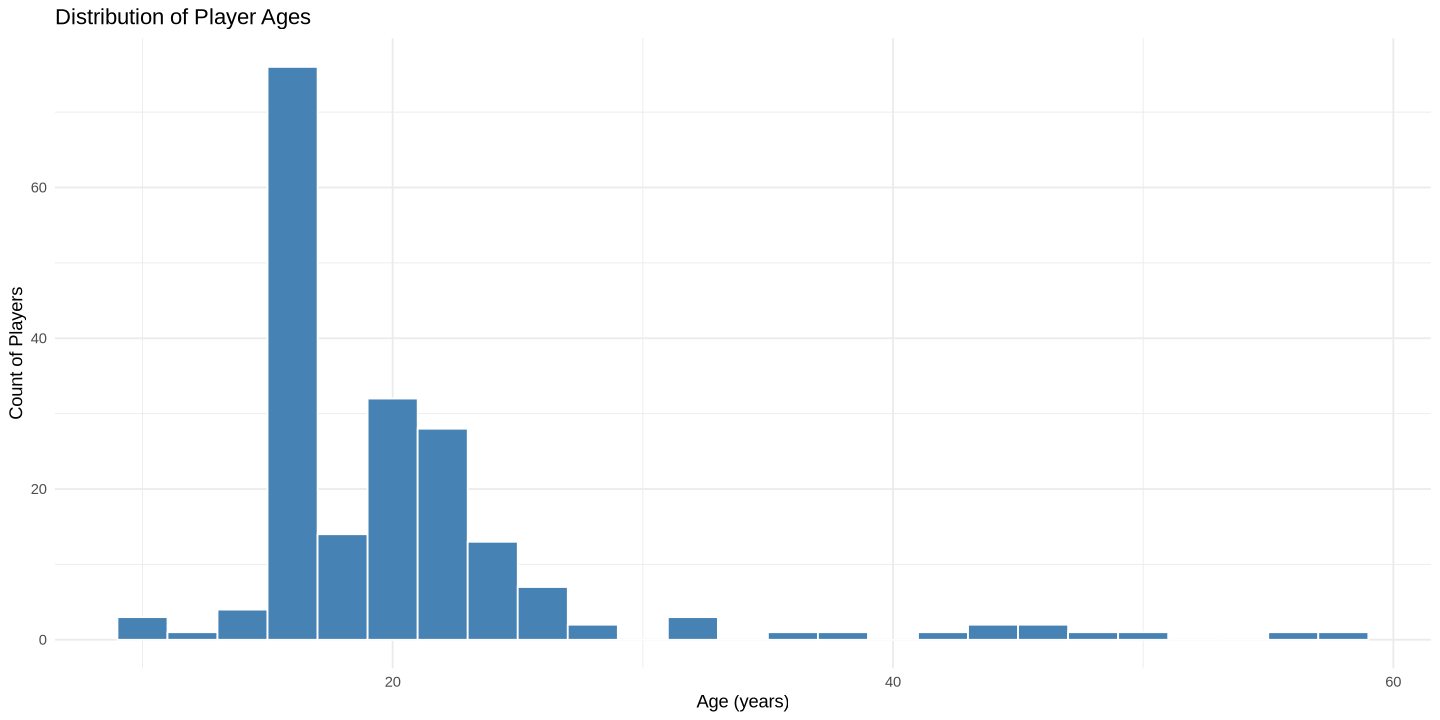

In [5]:
ggplot(players_data, aes(x = age)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Player Ages",
       x = "Age (years)",
       y = "Count of Players") +
  theme_minimal()


This plot shows which age groups are most common among players. For example, it shows that most players are in the 10-30 range, so the model may mostly reflect trends in that age range.

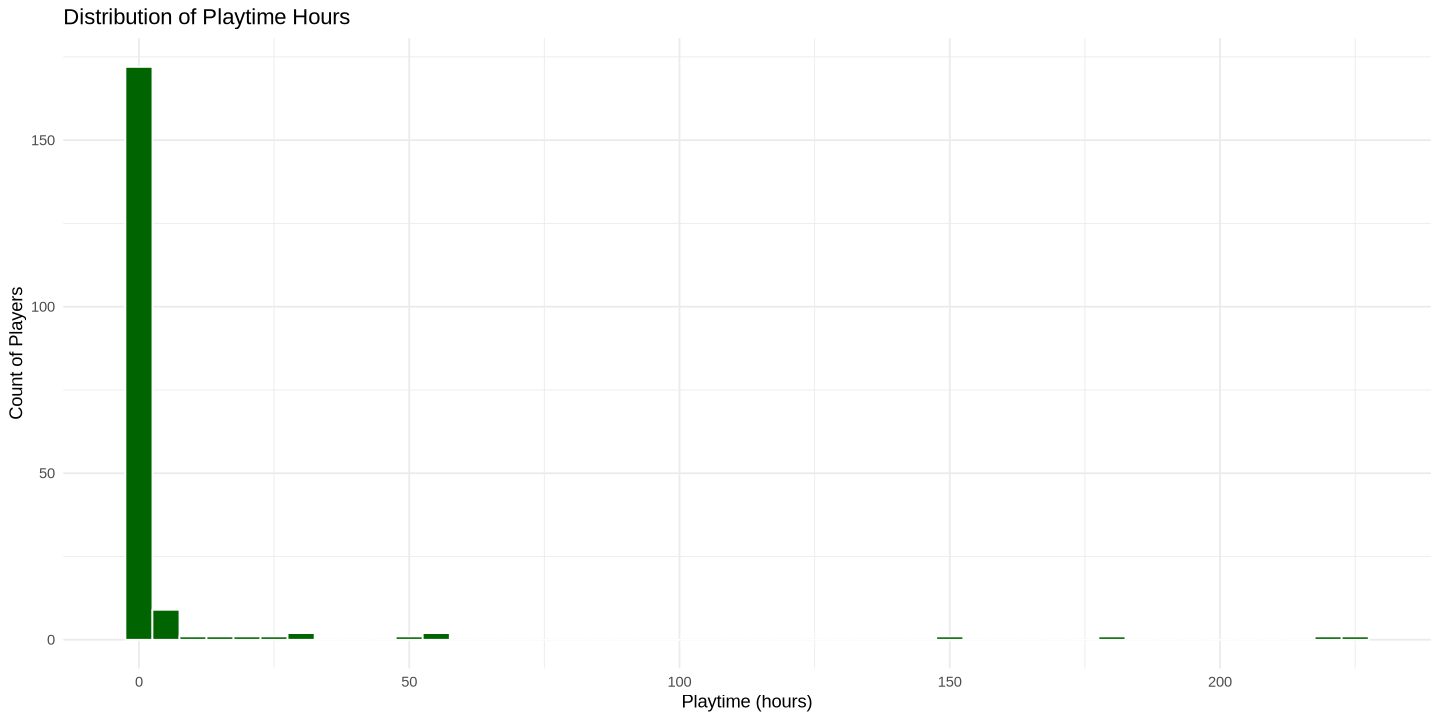

In [6]:
ggplot(players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "darkgreen", color = "white") +
  labs(title = "Distribution of Playtime Hours",
       x = "Playtime (hours)",
       y = "Count of Players") +
  theme_minimal()

This plot helps us understand the distribution between casual and heavy players. Here, we see that a vast majority of players played for zero hours, which may impact our prediction models.

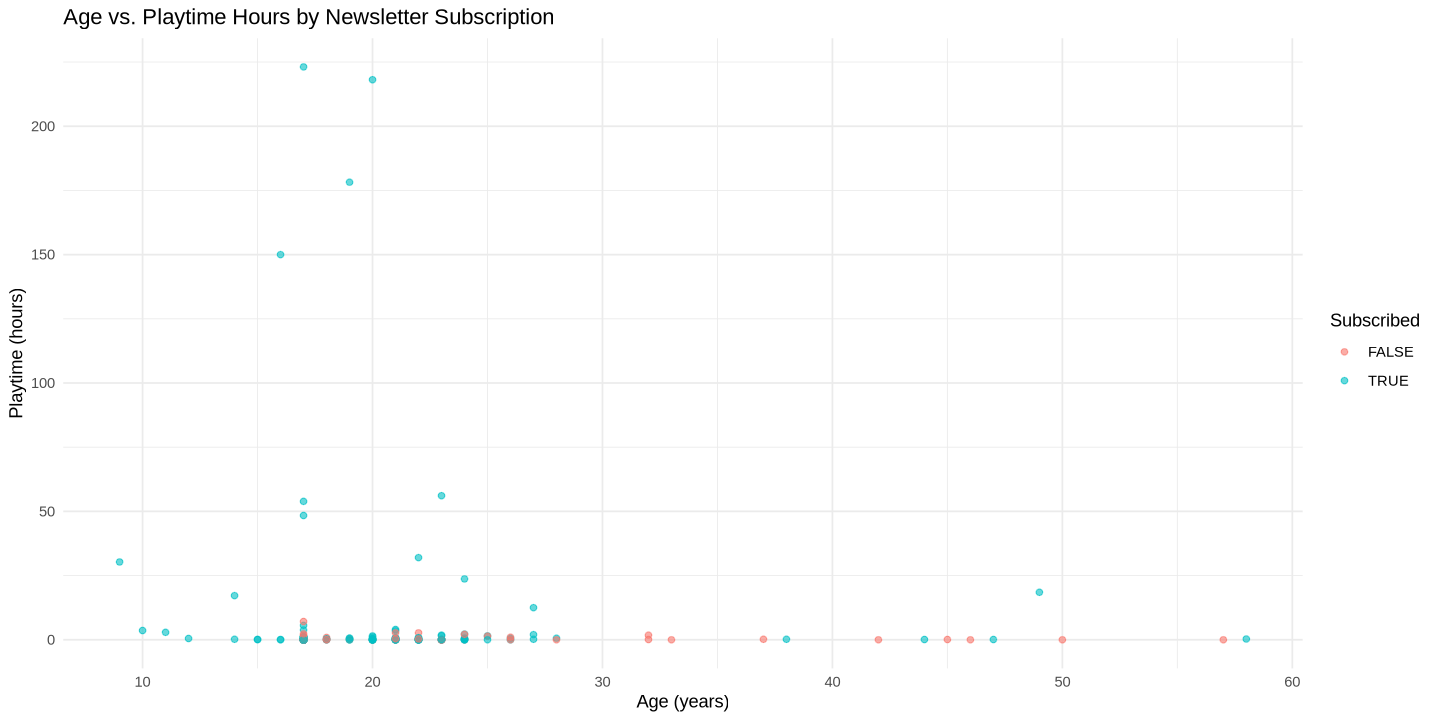

In [7]:
ggplot(players_data, aes(x = age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Age vs. Playtime Hours by Newsletter Subscription",
       x = "Age (years)",
       y = "Playtime (hours)",
       color = "Subscribed") +
  theme_minimal()

This graph shows that unsubscribed players (red) tend to be older and play less, while subscribed players (teal) have a wider spread of age and playtime, with a tendency for longer playtime and younger. This plot shows that there is probably a relationship between these variables, which can be defined using predictive modelling.

## Methods and Plans ##

I propose using **k-Nearest Neighbours (kNN)** as the predictive method.

### Why is kNN appropriate: ###
- The result we are predicting is binary (yes/no), so a classification method is needed (we cannot use linear regression)
- kNN does not assume a linear relationship between predictors and the outcome. This is useful since the relationship between age/playtime and subscription could be non-linear.

### Assumptions Required: ##
- kNN predictions rely on distance, so the data will need to be on comparable scales (need to be standardized).
- Each player’s data should be independent of other players.
- There should be enough observations of subscribed and non-subscribed players so neighbours can be meaningfully determined.

### Potential Limitations or Weaknesses ###
- For large datasets, kNN can be slow since distances are computed for all training examples. However, it should not be a problem since players.csv is a relatively small data set (< 200 observations).

### Model comparison and selection ###
- Use cross-validation on the training set to select the optimal k (number of neighbours).

### Data processing plan:

#### Data cleaning:
- Remove observations with missing data.
- Check for outliers in age and playtime hours.

#### Feature scaling:
- Standardize predictors (z-scores) so age and playtime contribute equally to distance.

#### Data splitting:
- Train/Test split: 70% training, 30% testing. This ensures enough data to train the model while still leaving a sufficiently large test set to evaluate performance.

#### Validation/hyperparameter tuning:
- Perform k-fold cross-validation (5-fold) on the training set to find the best k value. I chose 5-fold because it provides a good balance between reliable performance estimates and computational efficiency, especially for a small dataset.

#### Splitting stage:
- Split before any scaling or model fitting to prevent loss of information.
- Scaling on the training set is done after splitting, then applied to the test set.

#### Fit the final model using the training data:
- We already found the best k from cross-validation so we fit a kNN model on the scaled training set using that k.
- Use the model to predict on the test set.


